# LSTM Model

In [1]:
import numpy as np
import wandb
from datasets import load_dataset
from transformers import AutoTokenizer
import tensorflow as tf

c:\Users\asaju\Desktop\Intent-Classification\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("silicone", "maptask")

Found cached dataset silicone (C:/Users/asaju/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)
100%|██████████| 3/3 [00:00<00:00, 708.82it/s]


In [3]:
# Separate the dataset into train val and test
train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

# Separate X (Utterance) and y (Dialogue_Act)
train_X = train_dataset["Utterance"]
train_y = train_dataset["Label"]

val_X = val_dataset["Utterance"]
val_y = val_dataset["Label"]

test_X = test_dataset["Utterance"]
test_y = test_dataset["Label"]

In [4]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the data
train_encodings = tokenizer(train_X, truncation=True, padding=True)
val_encodings = tokenizer(val_X, truncation=True, padding=True)
test_encodings = tokenizer(test_X, truncation=True, padding=True)

# Convert labels from int to one-hot
train_y_one_hot = tf.one_hot(train_y, 12)
val_y_one_hot = tf.one_hot(val_y, 12)
test_y_one_hot = tf.one_hot(test_y, 12)

X_train = np.array(dict(train_encodings)["input_ids"])
y_train = np.array(train_y_one_hot)

X_val = np.array(dict(val_encodings)["input_ids"])
y_val = np.array(val_y_one_hot)

X_test = np.array(dict(test_encodings)["input_ids"])
y_test = np.array(test_y_one_hot)

In [5]:
# Create a LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(30522, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train
wandb.init(project="maptask")

# Callbacks
save_model = tf.keras.callbacks.ModelCheckpoint(filepath=wandb.run.dir + '/model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val, y_val), callbacks=[wandb.keras.WandbCallback(), save_model])

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: alexandre-sajus. Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/20
82/82 [==============================] - 18s 145ms/step - loss: 2.0521 - accuracy: 0.2986 - val_loss: 1.5351 - val_accuracy: 0.4705


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best)... Done. 0.1s


Epoch 2/20
82/82 [==============================] - 11s 127ms/step - loss: 1.4379 - accuracy: 0.5034 - val_loss: 1.2939 - val_accuracy: 0.5545


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best)... Done. 0.2s


Epoch 3/20
82/82 [==============================] - 11s 127ms/step - loss: 1.2402 - accuracy: 0.5756 - val_loss: 1.2082 - val_accuracy: 0.5829


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best)... Done. 0.2s


Epoch 4/20
82/82 [==============================] - 11s 132ms/step - loss: 1.1218 - accuracy: 0.6156 - val_loss: 1.1899 - val_accuracy: 0.5876


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best)... Done. 0.2s


Epoch 5/20
82/82 [==============================] - 11s 128ms/step - loss: 1.0690 - accuracy: 0.6291 - val_loss: 1.1680 - val_accuracy: 0.5866


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best)... Done. 0.2s


Epoch 6/20
82/82 [==============================] - 11s 129ms/step - loss: 1.0389 - accuracy: 0.6363 - val_loss: 1.1688 - val_accuracy: 0.5953
Epoch 7/20
82/82 [==============================] - 11s 130ms/step - loss: 0.9969 - accuracy: 0.6480 - val_loss: 1.1591 - val_accuracy: 0.5974


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets


INFO:tensorflow:Assets written to: c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best\assets
wandb: Adding directory to artifact (c:\Users\asaju\Desktop\Intent-Classification\wandb\run-20230404_105041-zwpblpku\files\model-best)... Done. 0.2s


Epoch 8/20
82/82 [==============================] - 11s 130ms/step - loss: 0.9637 - accuracy: 0.6588 - val_loss: 1.1900 - val_accuracy: 0.5933
Epoch 9/20
82/82 [==============================] - 11s 130ms/step - loss: 0.9407 - accuracy: 0.6646 - val_loss: 1.1612 - val_accuracy: 0.5940
Epoch 10/20
82/82 [==============================] - 11s 130ms/step - loss: 0.9069 - accuracy: 0.6749 - val_loss: 1.1860 - val_accuracy: 0.5984
Epoch 11/20
82/82 [==============================] - 11s 130ms/step - loss: 0.8868 - accuracy: 0.6822 - val_loss: 1.2065 - val_accuracy: 0.5886
Epoch 12/20
82/82 [==============================] - 11s 131ms/step - loss: 0.8562 - accuracy: 0.6919 - val_loss: 1.2127 - val_accuracy: 0.5984
Epoch 13/20
82/82 [==============================] - 11s 130ms/step - loss: 0.8510 - accuracy: 0.6942 - val_loss: 1.2302 - val_accuracy: 0.5862
Epoch 14/20
82/82 [==============================] - 11s 131ms/step - loss: 0.8296 - accuracy: 0.7001 - val_loss: 1.2569 - val_accuracy: 0

In [7]:
# Load the best model
model.load_weights(wandb.run.dir + '/model.h5')

In [8]:
# Evaluate
model.evaluate(X_test, y_test)

91/91 [==============================] - 2s 18ms/step - loss: 1.2132 - accuracy: 0.6102


[1.2131891250610352, 0.6102280616760254]

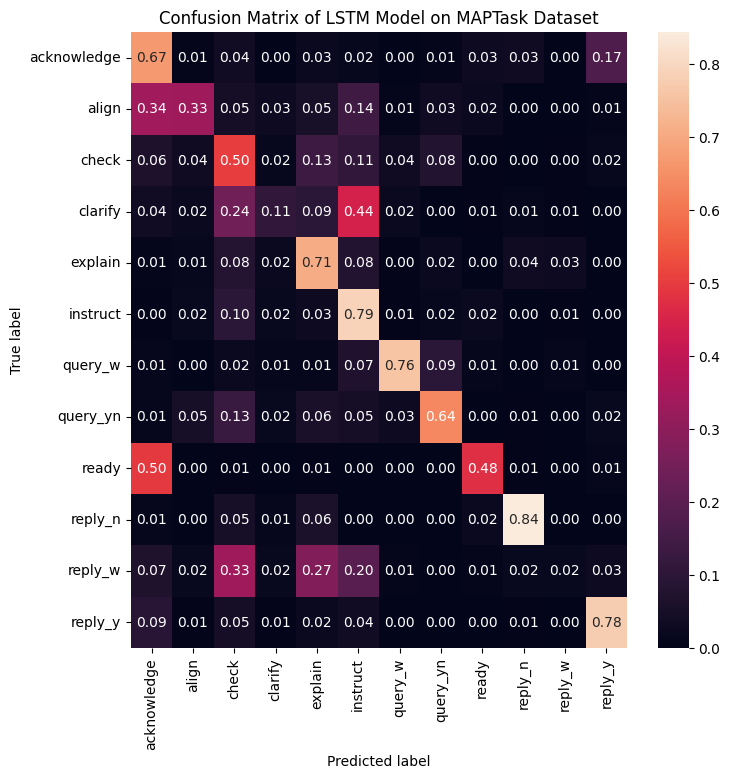

In [9]:
# Plot the confusion matrix of the 12 labels
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_plot = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_plot, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 8))
plt.title('Confusion Matrix of LSTM Model on MAPTask Dataset')
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=dataset["train"].features["Label"].names, yticklabels=dataset["train"].features["Label"].names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
